### SHAP Values 
SHAP (SHapley Additive exPlanations) values are a method used in machine learning to explain the output of a machine learning model for a particular prediction. They are based on cooperative game theory and provide a way to fairly distribute the "contribution" of each feature to the prediction. Besides, SHAP values help to explain complex and non-linear relationships between features.

Here is a lis of questions that SHAP values can help to answer:
- How much did each feature contribute to the prediction for this instance?
- What is the importance of a feature?
- What feature influenced a prediction the most?
- Why for a particular observation we got a certain prediction value?

SHAP is no the only method used for model interpretability. For example, there is also `LIME` (Local Interpretable Model-Agnostic Explanations). It is also was designed to obtain interpretable explanations for individual predictions. However, this method is outdated and SHAP is more modern solution that is implemented in most tree libraries (e.g. xgboost, lightGBM, ...) Besides, SHAP includes some logic from LIME.

### Linear Models 
Linear models, by their very nature, are highly interpretable. When you have a linear model like linear regression, the **coefficients associated with each feature provide a direct and intuitive interpretation** of the impact of each feature on the prediction. **There's no need for a complex explanation** method like SHAP values because the linear coefficients tell you exactly how each feature contributes to the outcome.

That's why we can use ordinary `Feature Importance` based on model weights to estimate the importacne of each feature. But keep in mind that it explains always linear dependencies.

### Non Linear Models
Non-linear models like Tree based models, NNs extract more complex (non-linear dependencies) from the data. Ordinary `Feature Importance` might become misleading estimate (doesn't take into account feature interaction) and lead to wrong assumptions, selected features and etc.

Non-linear models are way difficult to interpret. Sometimes even not possbile because of the complexity and used features. Thus, it would be great to have a tool to make them if not completely but at least more interpretable.

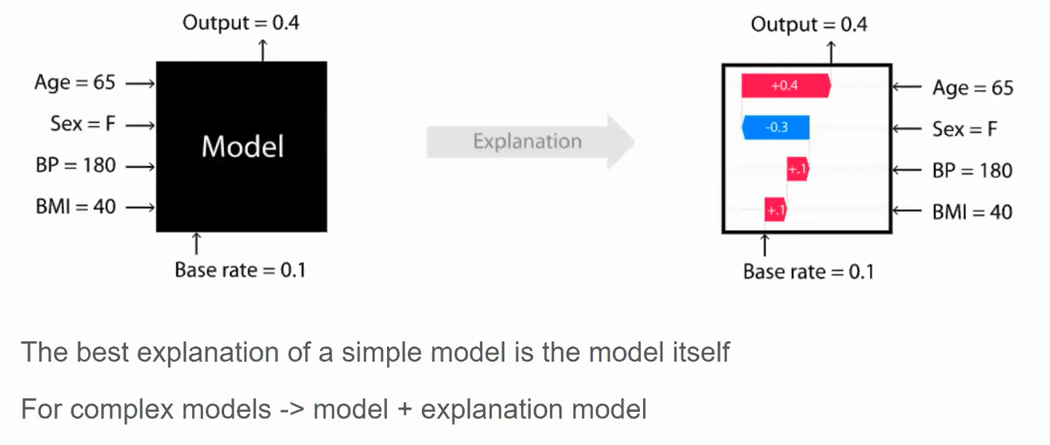

### Game Theory Fundamentals
- Use case: Basketbal players that must score the max score for a limited time. The more the final score the more the final reward (e.g. money)
- Question: What is the fairest way to split the final reward between the players?
- Shapely Approach: Find each player's contribution averaged over **every possible sequence** in which that player could have been added to the team/group.

Shapely values are named after Lloyd Shapley, who created them in 1951

### SHAP / Example
Let's assume that we have a band that consists of several people: 2 guitarists, 1 vocalist and 1 drummer. For 1 day they earn `X$`. By the end of the day we would like to fairly devide daily earnings. 

**How can we do it?**
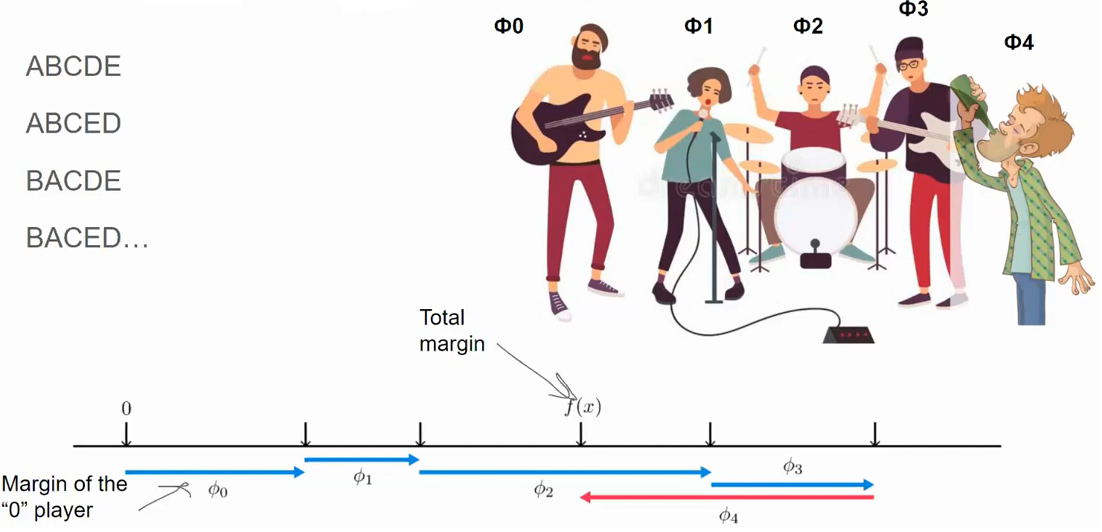

**Solution 1**
- Only 1 player: estimate how much a guitarist earn during the day (e.g. 100 euro)

- Only 2 players: estimate earnings by guitarist and vocalist (350 euro) -> vocalist conributes by 250 euro

- Only 3 players: estimate earnings by guitarist, vocalist adn drummer (e.g. 500 euro) -> drummer conributes by 150 euro

- All players: how much they earn all together (e.g. 500 euro) -> second guitarist donesn't contribute -> 0 euro

**What is the issue?**

The second guitarist cannot earn 0 because probably his contribution is the same as the first guitarist. If we consider only 1 player with two different gutarists, their contribution will be equal (100 euro). Thus, **we must consider the order or all different subsets of the players.**


**Solution 2**

Consider all possibe permutations of the players (P):
- P0, P1, P2, P3, P4
- P0, P1, P2, P4, P3
- P1, P0, P2, P3, P4,
- P1, P0, P3, P2, P4
- ...

Then we estimate contribution of each player in each permutation (e.g. 100, 150, 50, 120, ...) and the average it to get unbiased estimate of the contribution for each player. 

When calculation SHAP values we can **use a property:** for a certain object it's not important what sequence was before and after. For example:
- A, B, **C**, D, E
- B, A, **C**, D, E
- A, B, **C**, E, D

Thus, we can reduce the totla number of permutations! In ML case, players are features!

### SHAP Approximations Methods 
There are SHAP modifications methods that allows interpret almost any model in a reasonable time (not explanation here)

**Model-Agnostic Approximation**
- Independent SHAP
- Kernel SHAP (LIME + SHAP Values)

**Model-Specific Approximations**
- Linear SHAP
- Low-Order SHAP
- Max SHAP
- Deep SHAP (DeepLIFT + SHAP Values)
- Weighted SHAP (recent SHAP modification)

### What is Feature Importance in Tree Models?
When building a tree model and making a new split we reduce the error on train data. Let's then take a feature (e.g. `number of sessions`) and find all splits where this feature was used. Then sum all this errors reduction -> `gain`. 

Gain tells us how presence of a certain feature allowed reducing train error. Thus, we may say that gain is a importance of a feature. The more the gain the more important the feature. However, it's not always the case. Let's have a look at the following example:

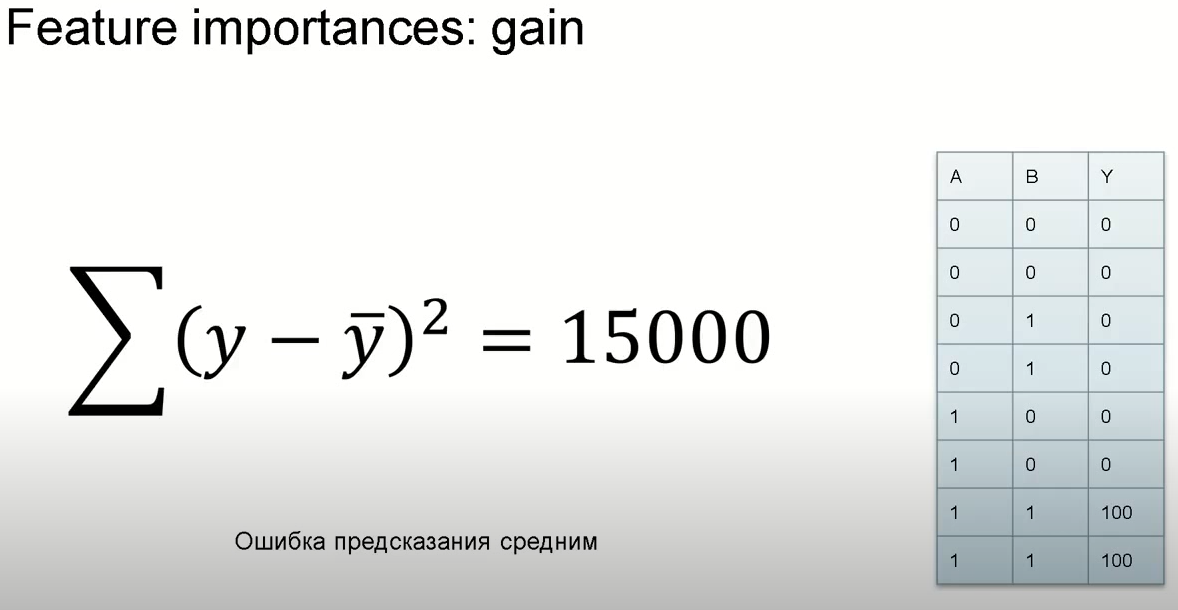
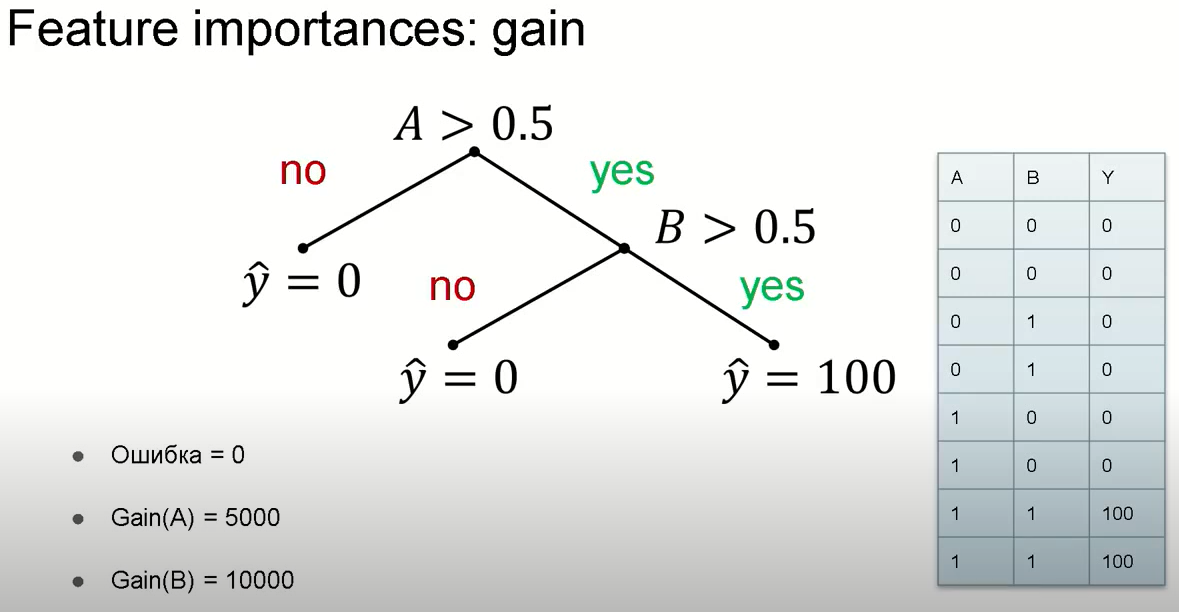

According to the pics above we see that feature B provides the best gain and thus must be the most important. However, it's not true. Both features have equal importance. We may have many examples like above. Thus, **we should not rely on feature importance using `gain`.** We need another approach. 
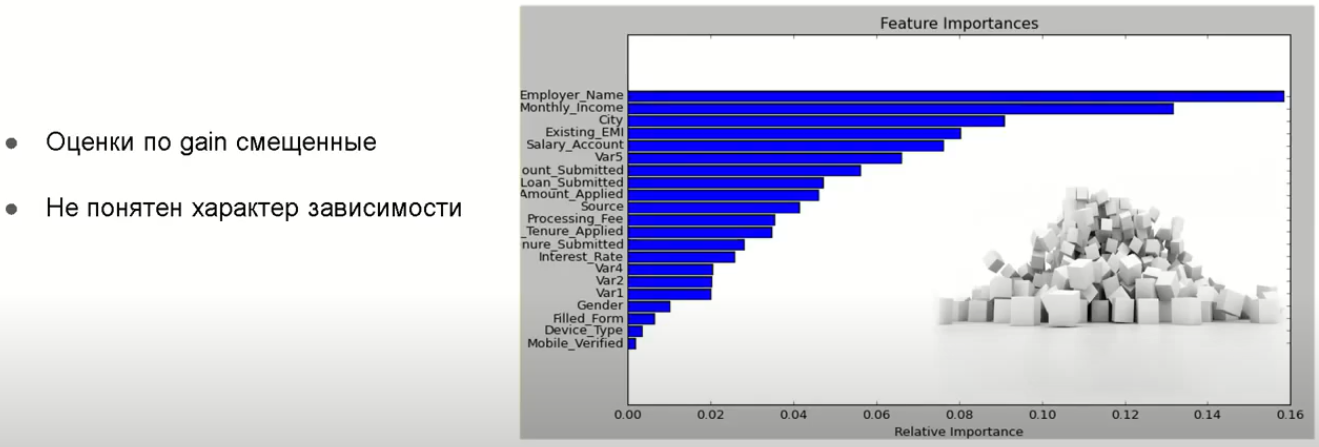

The main issue of such graphs -> they **don't reflect the dependency between a feature and target variable.** However, this is the most interesting point. We always would like to know this. Thus, better use SHAP.

### SHapley Additive Explanation
**Simplest Explanation**

Let's assume that we took a random observation from the data and got a prediction `f(x)`. Then, we "hide" one feature from all features, train a model on `n-1` feature and made a prediction for the same observation again. We will get a different prediction (it's obvious): `f'(x)`.

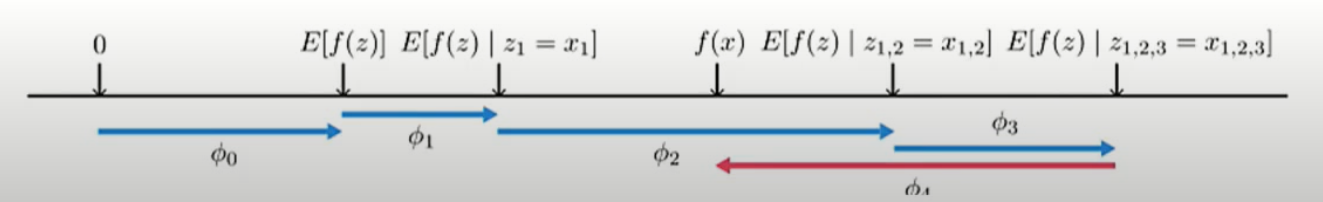

The picture above explains how adding features (phi0, ...phi4) affects the prediction value `f(x)`. Thus, arrow length and direction describes the contribution or importance of a feature.

### Non Linear Dependency. What Does it Mean?
Refers to a relationship or association between variables that **cannot be adequately described by a linear model.** In other words, the relationship between the variables is not a straight line or a constant ratio. **Instead, it exhibits more complex and curved patterns.**

Bulding non-linear models already assumes that we have non linear dependencies in the data. Thus, **the features interract with each other and thus the order of features / their set is extremely important.**

**In the picture above we hid features sequentially and didn't take into account features set.** Ideally, we need to iterate over all possible combinations of features and then average those arrows. For example, if we have 50 features we need to iterate over 50! feature subsets, it's huge subset, plus on each iteration we must train a model n times (n - number of features).

Fortunately, SHAP values allows to estimate those contributions in a reasonable time and estimate feature contributions without model retraining! For more detains visit the original article.

### How Do Features Affect on Each Sample Prediction?
For each observation we can have a look at the following contribution plot (single observation)
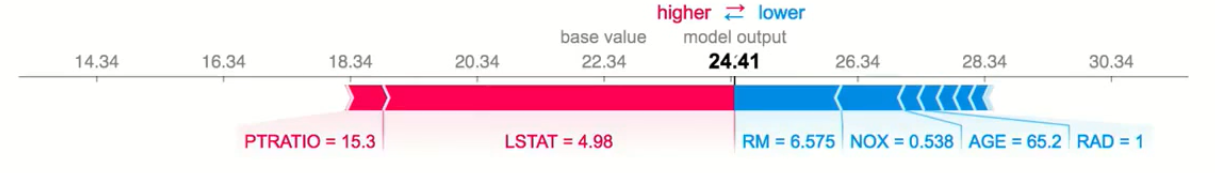

- model prediction: `24.41`
- the most important feature: `LSTAT`
    - LSTAT 4.98 increased model prediction by 5, 5 is a SHAP value.
- `RM = 6.575` reduced model prediction by 1.5
    - SHAP Value for RM -> -1.5

SHAP values have the following shape: `[n_samples * n_features]`. **Sum of SHAP values must be equal to predicted value.**

**All Observations Scatter Plot**

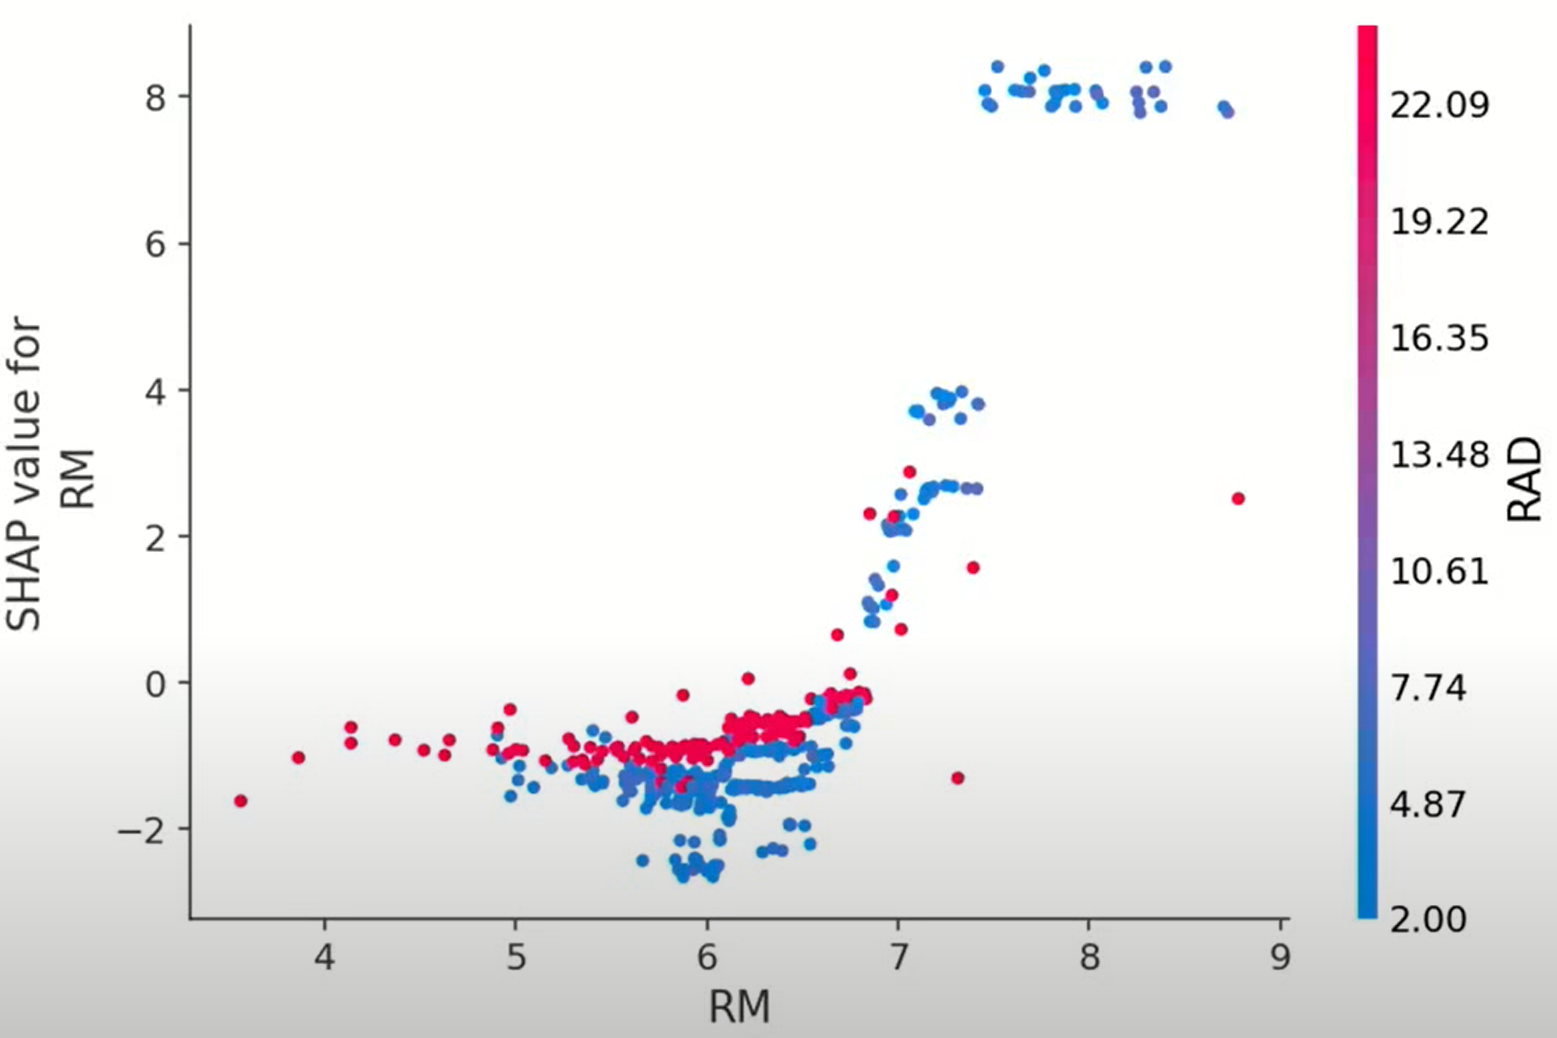

This plots are good for interpretation.
- `RM > 8`, `SHAP > 8` (i.e. the more the RM the more the SHAP and the more the prediction)
- Can check features interactions (red color -> another feature)

### SHAP Feature Importance Plot
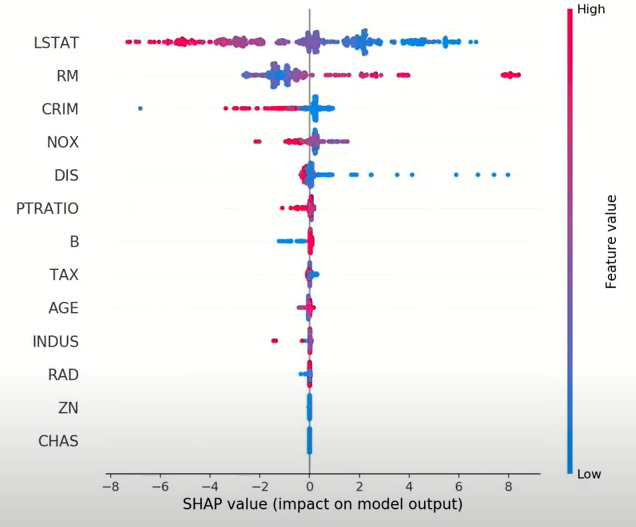

**How can we get SHAP importances from SHAP values?**
- Absolute SHAP values are summed up to get Absolute SHAP importance for a feature 
- Features on SHAP importance plot are ordered (from the most important till the least)
- Each point -> an observation with a certain SHAP value and feature value 

### SHAP Importance / Examples
**Sentiment Analysis / NLP**
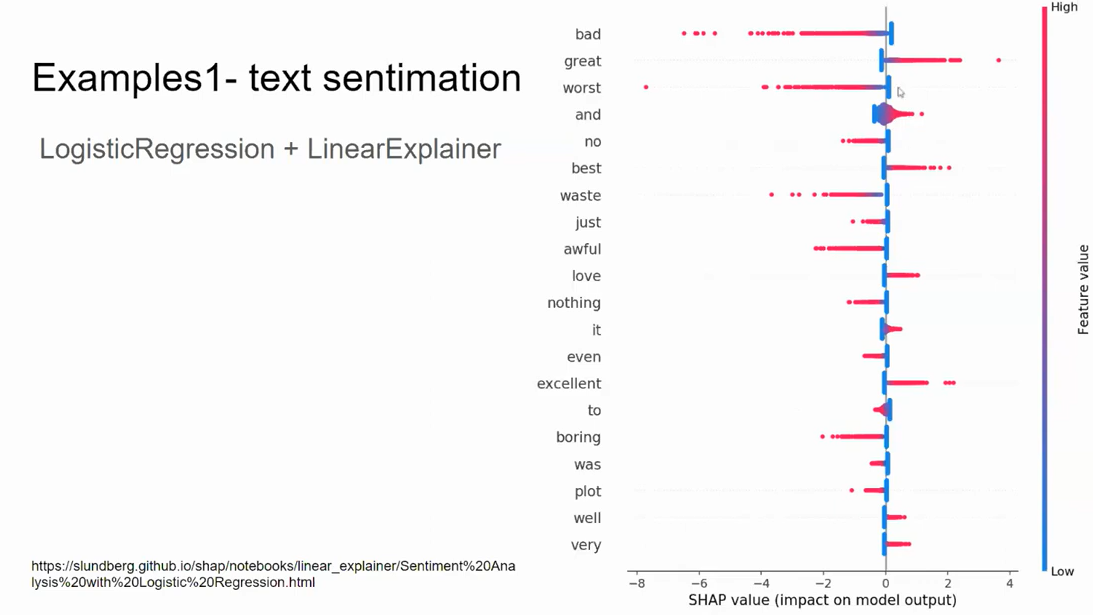

The plot looks logical and explains the feature importance in a good way

**Conv NN + Deep Explainer (DeepLIFT)**

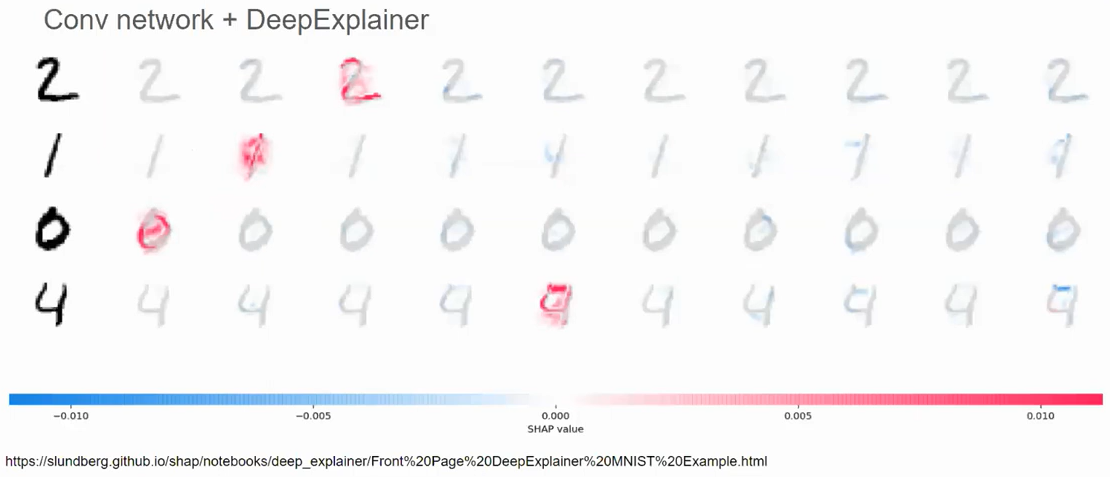

Grey colors we have output neurons from ConvNet. Firt neuron is responsible for 0, the second for 1, etc. We can observe what pixels are important to identify a certain number.

**Features Interactions**

SHAP values can be used to detect features interactions. We can use this to select relevant subgroups of features.

We can plot **correlation between SHAP values for features:**
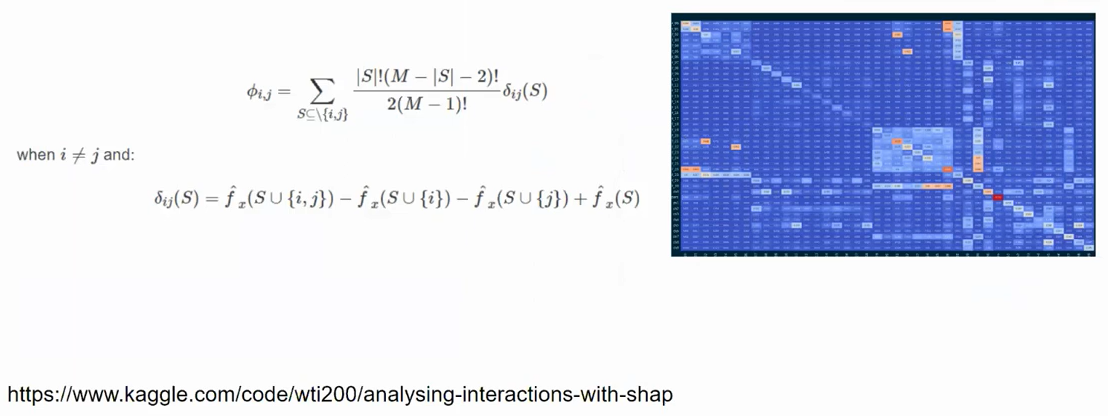

We can also plot such interactions:
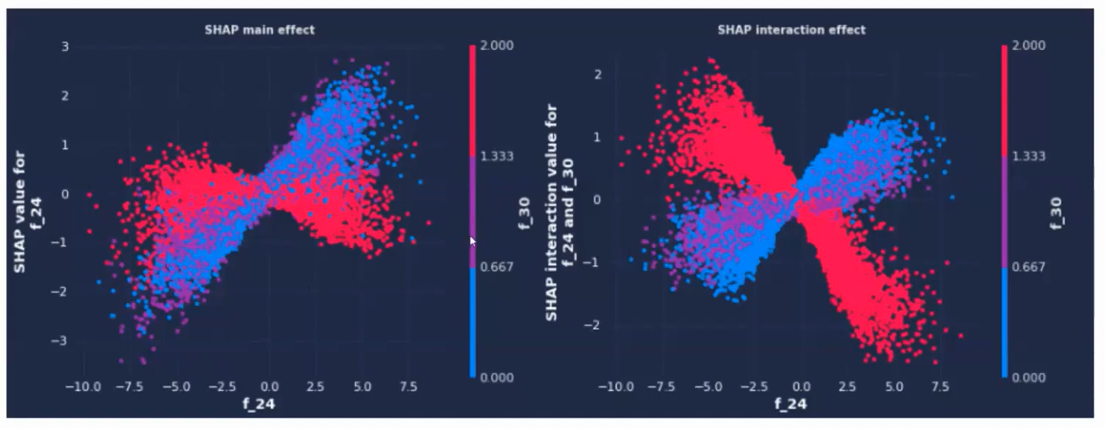

- On the left plot we plot the dependence between `f_24` and its SHAP value
- On the right plot we plot the dependence between `f_24` and SHAP interaction value between `f_24` and `f_30` + color using `f_30` value

We observe that the dependence is different between the plots -> assume that interaction exists

**SHAP Values Clusterization**
1. Get SHAP values 
2. Cluster them

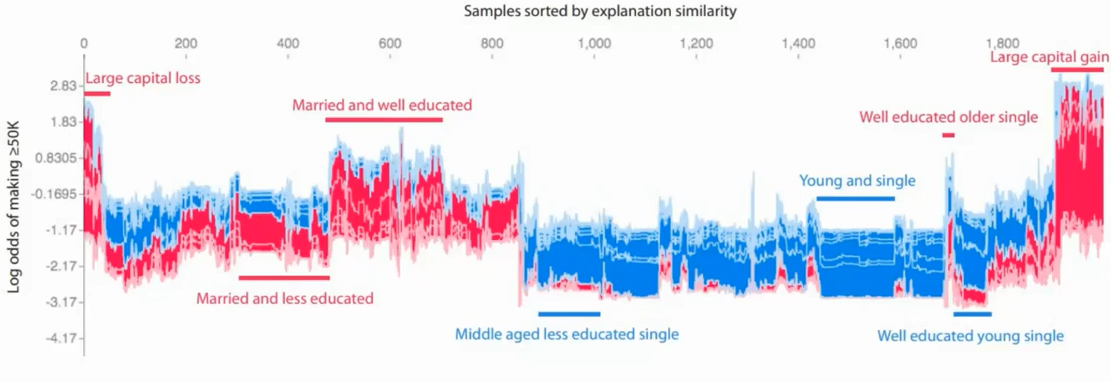

It may help to get better groups when clustering SHAP values instead of raw feature vectors

**SHAP Loss Values**

Can estimate how each feature affects loss function
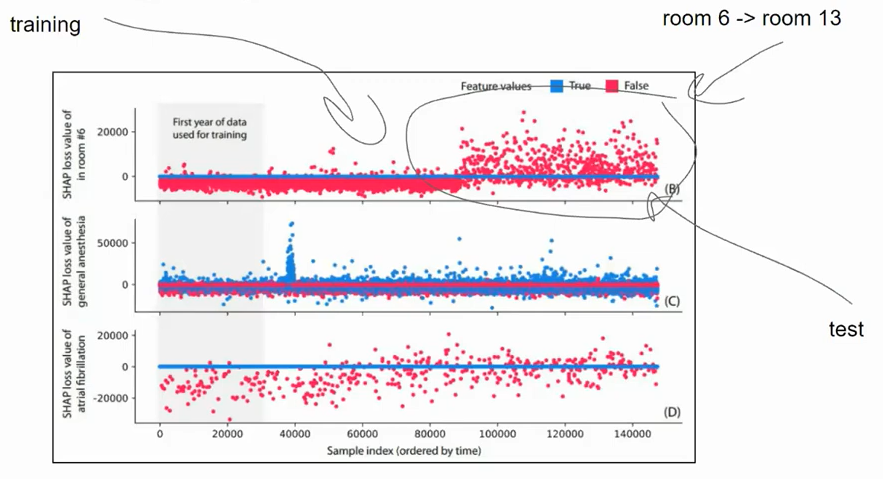

Feature `room_6` was substituted by `room_13` in test data that affected the performance on test data (detected feature drift)

### Links
- https://www.youtube.com/watch?v=CMe-jm3RXHc&t=1340s
- https://github.com/shap/shap
